In [1]:
import pandas_ods_reader as pds
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import scipy.stats as sc
import statsmodels.api as sm
import numpy as np

In [3]:
df=pds.read_ods("dataset_monthly.ods",1)

In [4]:
print(df.head())

     date  usd/pound  usd/ton CLP_DATE   Exc_1 YUAN_DATE   Exc_2  usd/pound5  \
0  Dec 90     2.5470   5094.0   Dec 90  332.25    Dec 90  5.2352     2.54701   
1  Jan 91     2.5506   5101.2   Jan 91  342.00    Jan 91  5.2352     2.55064   
2  Feb 91     2.5327   5065.4   Feb 91  340.00    Feb 91  5.2352     2.53273   
3  Mar 91     2.5027   5005.4   Mar 91  345.50    Mar 91  5.2352     2.50265   
4  Apr 91     2.5220   5044.0   Apr 91  338.75    Apr 91  5.3036     2.52198   

   usd/ton5  
0   5094.02  
1   5101.28  
2   5065.46  
3   5005.30  
4   5043.96  


In [5]:
x=list(df["Exc_1"])
n=len(x)

In [7]:
y=list(df["usd/ton5"])
random_list=[i for i in range(355)]
print(len(x),len(y))

355 355


In [12]:
xstd,ystd=sc.tstd(x,ddof=1),sc.tstd(y,ddof=1)
xm,ym=np.mean(x),np.mean(y)
xn=sc.zscore(x,axis=0,ddof=2)
yn=sc.zscore(y,axis=0,ddof=2)

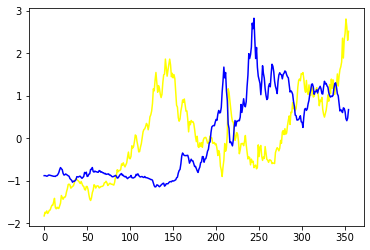

In [14]:
plt.plot(xn,color="yellow")
plt.plot(yn,color="blue")
plt.show()

In [29]:
x_tr,x_te,y_trr,y_tre=train_test_split(xn,random_list,random_state=5,test_size=0.34)

In [30]:
x_tr=np.array(x_tr)
y_tr=np.array([yn[i] for i in y_trr])
print(len(x_tr),len(y_tr))
model=sm.OLS(x_tr.reshape(-1,1),y_tr).fit()
model.summary()

234 234


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              13.75
Date:                Sat, 01 Aug 2020   Prob (F-statistic):                    0.000261
Time:                        19:26:17   Log-Likelihood:                         -321.86
No. Observations:                 234   AIC:                                      645.7
Df Residuals:                     233   BIC:                                      649.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2342      0.063      3.708      0.000       0.110       0.359
==============================================================================
Omnibus:                       15.517   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.866
Skew:                           0.407   Prob(JB):                      0.00437
Kurtosis:                       2.327   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pre=model.predict(x_te)

In [32]:
def z_inv(l):
    r=[i*(ystd-2)+ym for i in l]
    return r

In [33]:
act_pre=z_inv(pre)

In [34]:
act_te=[y[i] for i in y_tre]

In [35]:
np.sqrt(sk.metrics.mean_squared_error(act_te,act_pre))

6318.569772012161

In [38]:
y_ins=[y[i] for i in y_trr]
x_ins=[x[i] for i in y_trr ]

In [39]:
sc.pearsonr(y_ins,x_ins)[0]**2

0.05567037513861558

In [40]:
sc.pearsonr(act_pre,x_te)[0]**2

1.0